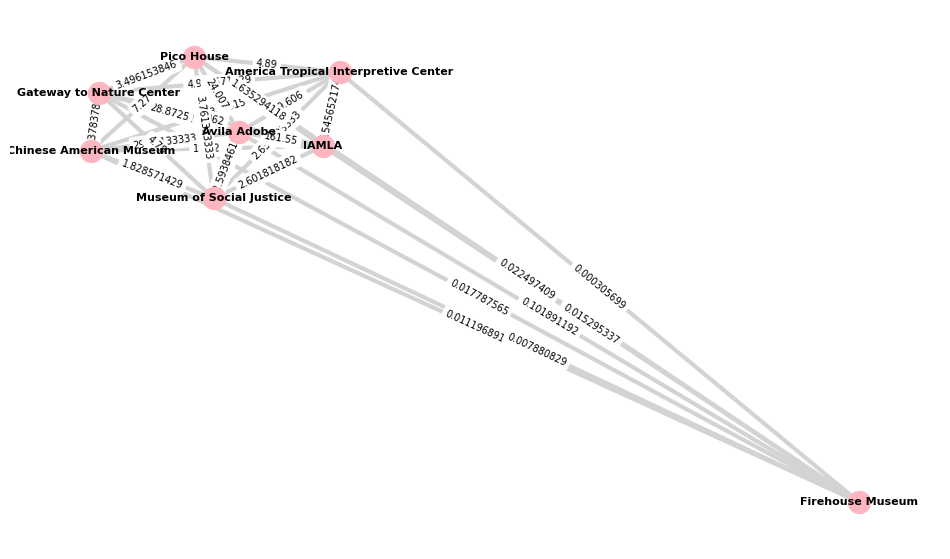

In [3]:
#Data de referência do grafo: 01/07/2019
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregando os dados do CSV com codificação 'ISO-8859-1'
data = pd.read_csv('grafo.csv', delimiter=';', encoding='ISO-8859-1')

# Substituindo vírgulas por pontos nas colunas 'Weight' e 'Distância (Km)'
data['Weight'] = data['Weight'].str.replace(',', '.')

# Convertendo as colunas 'Weight' e 'Distância (Km)' para float
data['Weight'] = data['Weight'].astype(float)

# Crie um objeto de grafo não direcionado
G = nx.Graph()

# Itere sobre as linhas do DataFrame e adicione as arestas com pesos ao grafo
for index, row in data.iterrows():
    G.add_edge(row['Node1'], row['Node2'], weight=row['Weight'])
fig, ax = plt.subplots(figsize=(12, 7))
# Plote o grafo
pos = nx.spring_layout(G, k=1.2)  # Layout para visualização
nx.draw(G, pos, with_labels=True, node_size=250, node_color='lightpink', font_size=8, font_color='black', font_weight='bold', edge_color='lightgray', width=3)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.axis('off')  # Desativar os eixos
plt.show()



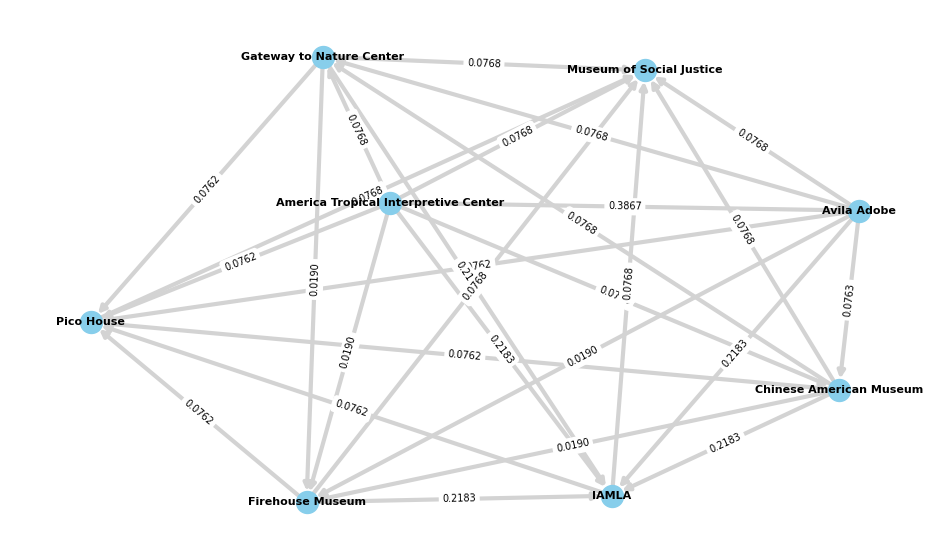

In [5]:
# Calculando o PageRank do grafo
pagerank = nx.pagerank(G)

# Recupere os 3 nós mais prováveis de serem visitados a partir do nó de origem
most_likely_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:3]

# Crie um novo grafo onde o peso da aresta é a probabilidade de visita
new_graph = nx.DiGraph()

for source, target in G.edges():
    weight = G[source][target]['weight']
    new_weight = pagerank[target]
    new_graph.add_edge(source, target, weight=new_weight)

# Plote o novo grafo ponderado
fig, ax = plt.subplots(figsize=(12, 7))  # Ajuste o tamanho da figura conforme necessário
pos = nx.spring_layout(new_graph, k=1.5)
edge_labels = {(u, v): f"{d['weight']:.4f}" for u, v, d in new_graph.edges(data=True)}
nx.draw(new_graph, pos, with_labels=True, node_size=250, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='lightgray', width=3)
nx.draw_networkx_edge_labels(new_graph, pos, edge_labels=edge_labels, font_size=7)
plt.axis('off')  # Desativar os eixos
plt.show()

In [7]:
df = pd.DataFrame(columns=['Origem', 'Destino', 'Peso'])
u = 'IAMLA'
for u in G.nodes():
    # Obter todas as arestas incidentes ao nó 'u' com seus pesos
    incident_edges = new_graph.edges(u, data='weight')

    # Verificar se o nó tem arestas incidentes
    if incident_edges:
        # Encontrar a aresta de maior peso
        max_weight_edge = max(incident_edges, key=lambda x: x[2])

        # Obter o nó ligado a 'u' pela aresta de maior peso
        v = max_weight_edge[1]
        df2 = pd.DataFrame([u,v,max_weight_edge[2]])
        df = pd.concat([df,df2], ignore_index=True)
        print(f'O nó ligado a {u} pela aresta de maior peso é {v} com peso {max_weight_edge[2]}')

O nó ligado a America Tropical Interpretive Center pela aresta de maior peso é Avila Adobe com peso 0.38671258422438365
O nó ligado a Avila Adobe pela aresta de maior peso é IAMLA com peso 0.2183059836125501
O nó ligado a Chinese American Museum pela aresta de maior peso é IAMLA com peso 0.2183059836125501
O nó ligado a Gateway to Nature Center pela aresta de maior peso é IAMLA com peso 0.2183059836125501
O nó ligado a Firehouse Museum pela aresta de maior peso é IAMLA com peso 0.2183059836125501
O nó ligado a IAMLA pela aresta de maior peso é Museum of Social Justice com peso 0.0768113326635817
O nó ligado a Pico House pela aresta de maior peso é Museum of Social Justice com peso 0.0768113326635817
